<a href="https://colab.research.google.com/github/NithyaSanthoshiniK/Machine-Learning-Projects/blob/main/Medical_Insurance_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'/Users/nithyasanthoshini/Desktop/Innomatics/ML Case Studies/Medical Cost Prediction/insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Step 1:  Exploratory Data Analysis

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Basic information about the DataFrame
print("Number of features (columns):", df.shape)
print("Number of observations (rows):", df.shape[0])

Number of features (columns): (1338, 7)
Number of observations (rows): 1338


In [ ]:
print("\nData types of each feature:")
print(df.dtypes)


Data types of each feature:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
print(df['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
print(df['age'].unique())

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]


In [ ]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
bins = [0, 18, 30, 40, 50, 60, 70, 120]
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [ ]:
df['age_group'] = df['age_group'].astype('category')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,18-29
1,18,male,33.770,1,no,southeast,1725.55230,18-29
2,28,male,33.000,3,no,southeast,4449.46200,18-29
3,33,male,22.705,0,no,northwest,21984.47061,30-39
4,32,male,28.880,0,no,northwest,3866.85520,30-39
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,50-59
1334,18,female,31.920,0,no,northeast,2205.98080,18-29
1335,18,female,36.850,0,no,southeast,1629.83350,18-29
1336,21,female,25.800,0,no,southwest,2007.94500,18-29


## Data Visualizations

/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


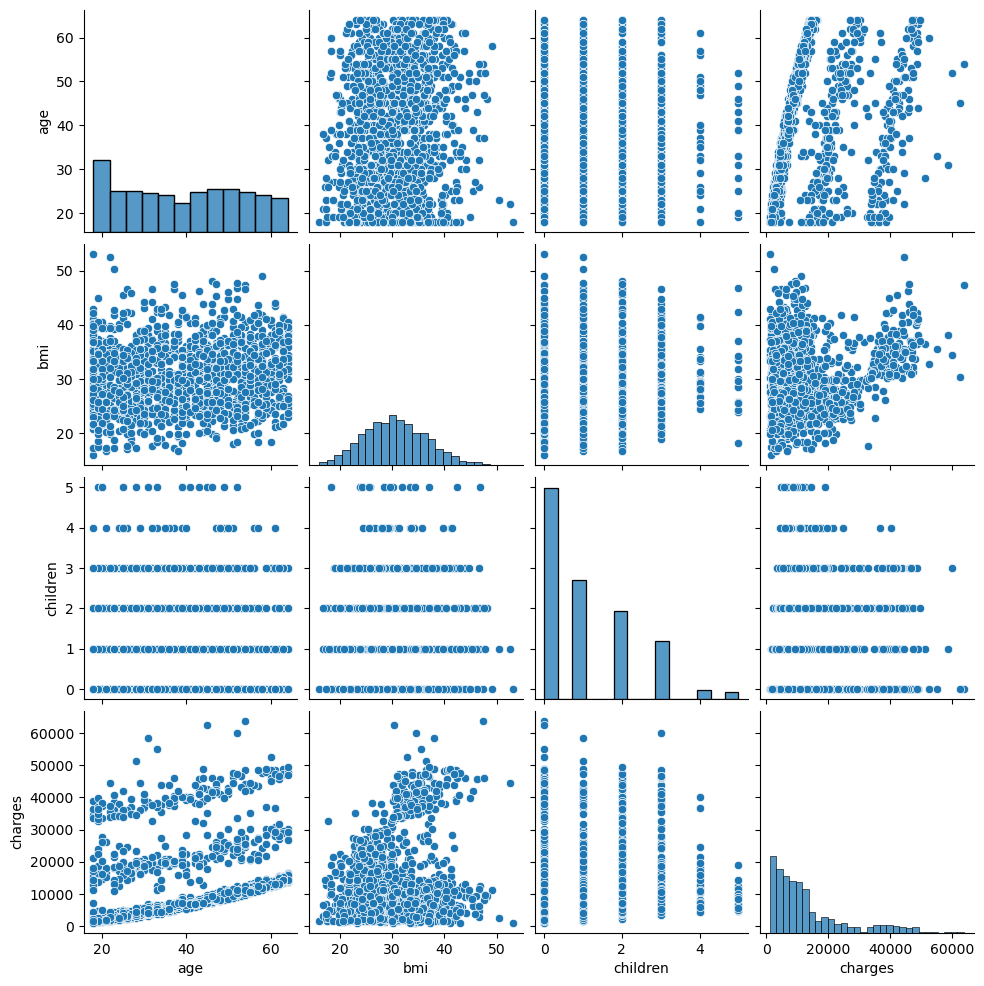

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Axes: title={'center': 'children'}, xlabel='children', ylabel='count'>

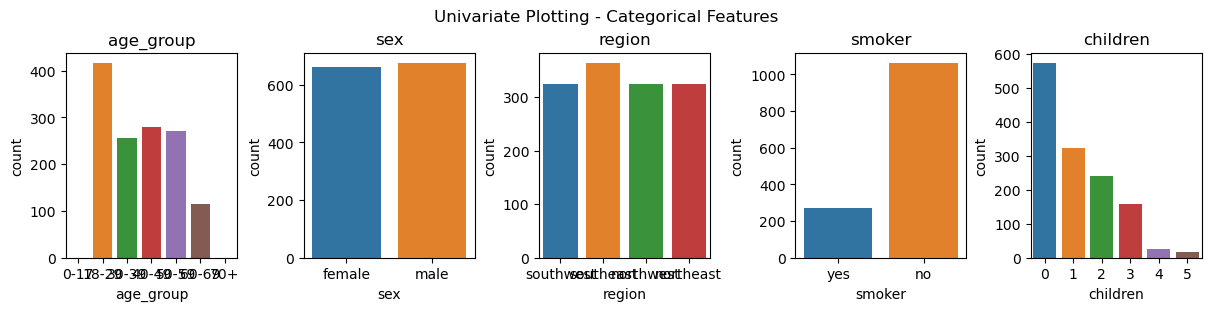

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features")

axs[0].set_title("age_group")
sns.countplot(data=df,x='age_group',ax=axs[0])

axs[1].set_title("sex")
sns.countplot(data=df,x='sex',ax=axs[1])

axs[2].set_title("region")
sns.countplot(data=df,x='region',ax=axs[2])

axs[3].set_title("smoker")
sns.countplot(data=df,x='smoker',ax=axs[3])

axs[4].set_title("children")
sns.countplot(data=df,x='children',ax=axs[4])

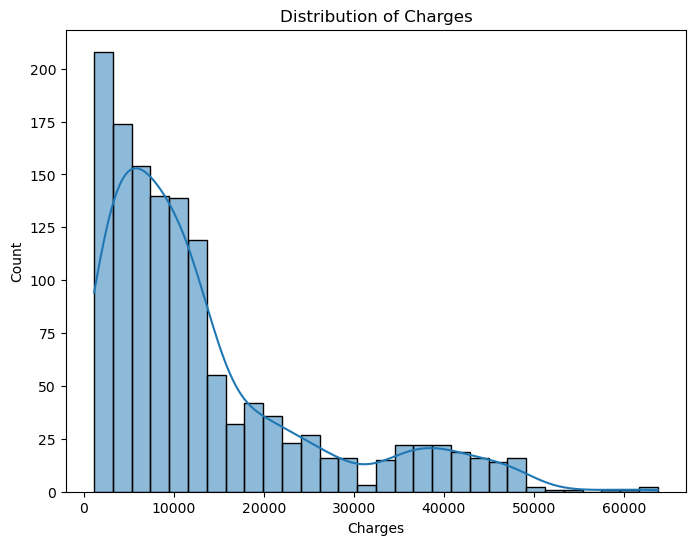

In [ ]:
# Distribution of charges
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

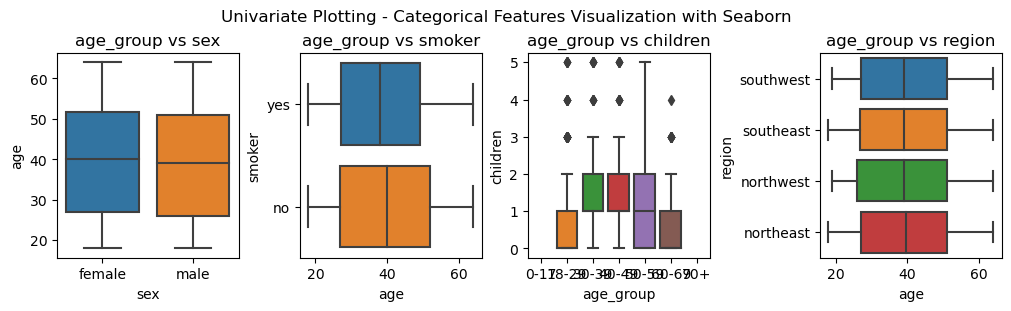

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features Visualization with Seaborn")

axs[0].set_title("age_group vs sex")
sns.boxplot(data=df,y='age',x='sex',ax=axs[0])

axs[1].set_title("age_group vs smoker")
sns.boxplot(data=df,x='age',y='smoker',ax=axs[1])

axs[2].set_title("age_group vs children")
sns.boxplot(data=df,x='age_group',y='children',ax=axs[2])

axs[3].set_title("age_group vs region")
sns.boxplot(data=df,x='age',y='region',ax=axs[3])

plt.show()

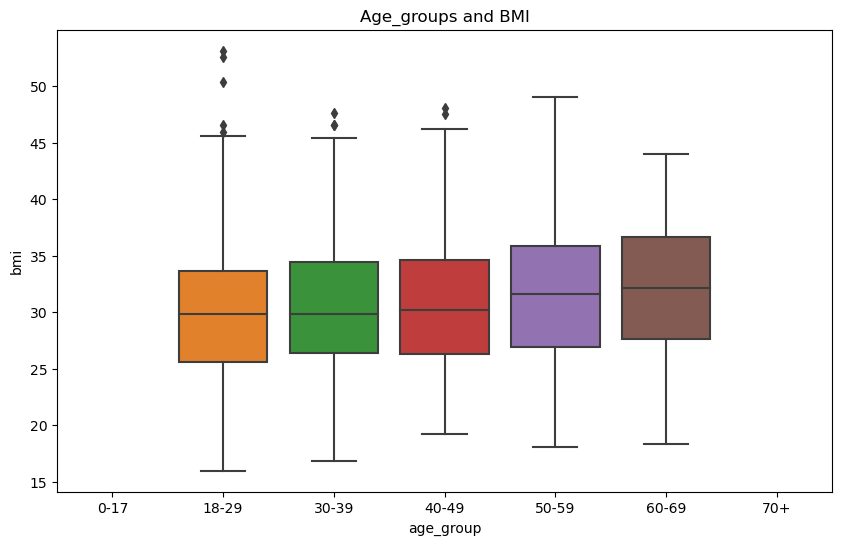

In [ ]:
# Boxplot of age_groups and BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='bmi', data=df)
plt.title('Age_groups and BMI')
plt.show()

## charges

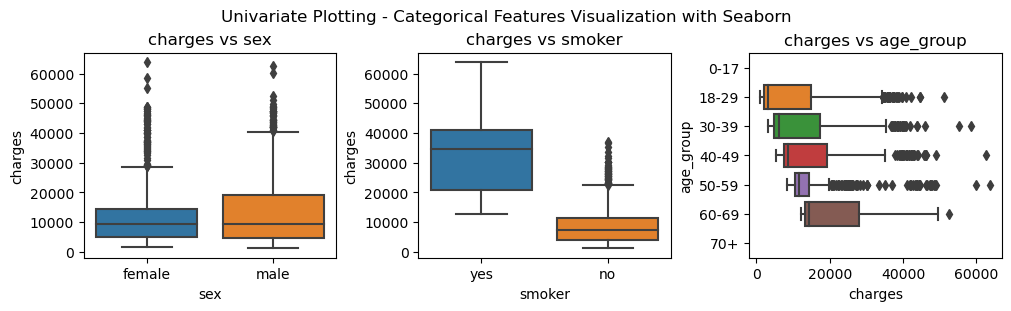

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features Visualization with Seaborn")

axs[0].set_title("charges vs sex")
sns.boxplot(data=df,y='charges',x='sex',ax=axs[0])

axs[1].set_title("charges vs smoker")
sns.boxplot(data=df,y='charges',x='smoker',ax=axs[1])

axs[2].set_title("charges vs age_group")
sns.boxplot(data=df,x='charges',y='age_group',ax=axs[2])

plt.show()

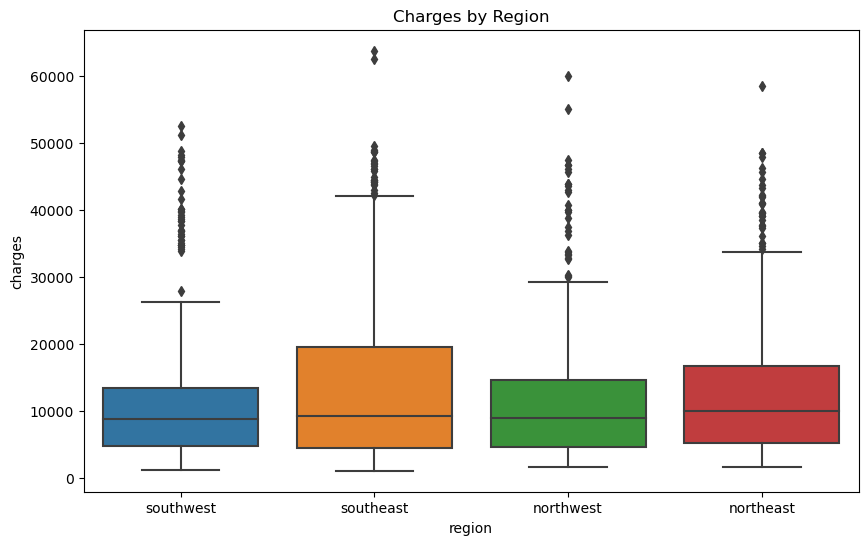

In [ ]:
# Boxplot of charges by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.show()

## Step 2 - Machine Learning

#### 1.Identify the input and output/target variables.
Input variables: age, sex, bmi, children, smoker, region

Output/target variable: charges

#### 2.Identify the type of ML Task.
This is a regression task since we are predicting a continuous variable (medical costs).

#### 3.Identify the Evaluation Metric.
For this regression task, we will use Mean Absolute Error (MAE) as the evaluation metric.


## Step 3: Split the dataset into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

# Define input and output variables
X = df.drop(columns=['charges', 'age_group'])
y = df['charges']

# Split the dataset into training and testing sets (75:25 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [ ]:
X_train.head()

,age,sex,bmi,children,smoker,region
693,24,male,23.655,0,no,northwest
1297,28,female,26.510,2,no,southeast
634,51,male,39.700,1,no,southwest
1022,47,male,36.080,1,yes,southeast
178,46,female,28.900,2,no,southwest


In [ ]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['float64','int64'])

In [ ]:
 X_train_cat.head(5)

,sex,smoker,region
693,male,no,northwest
1297,female,no,southeast
634,male,no,southwest
1022,male,yes,southeast
178,female,no,southwest


In [ ]:
 X_train_num.head()

,age,bmi,children
693,24,23.655,0
1297,28,26.510,2
634,51,39.700,1
1022,47,36.080,1
178,46,28.900,2


## Step 4: Data preparation on train data
 For numerical variables, we will use StandardScaler for standardization. For categorical variables, we will use OneHotEncoder.

### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = scaler.get_feature_names_out(),
                                   index = X_train_num.index)

X_train_num_transformed.head()

,age,bmi,children
693,-1.087167,-1.140875,-0.917500
1297,-0.802106,-0.665842,0.743605
634,0.836992,1.528794,-0.086947
1022,0.551932,0.926476,-0.086947
178,0.480667,-0.268178,0.743605


In [ ]:
X_train_num_transformed.describe()

,age,bmi,children
count,1.003000e+03,1.003000e+03,1003.000000
mean,1.629360e-16,1.062626e-16,0.000000
std,1.000499e+00,1.000499e+00,1.000499
min,-1.514757e+00,-2.421218e+00,-0.917500
25%,-8.733711e-01,-7.157574e-01,-0.917500
50%,-1.818931e-02,-5.187588e-02,-0.086947
75%,8.369925e-01,6.519384e-01,0.743605
max,1.763439e+00,3.763363e+00,3.235263


### OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)
X_train_cat_transformed = pd.DataFrame(encoder_.fit_transform(X_train_cat),
                                   columns = encoder_.get_feature_names_out(),
                                   index = X_train_cat.index)

print("Shape of Data before Transformation: ", X_train_cat.shape)
print("Shape of Data after Transformation: ",X_train_cat_transformed.shape)

X_train_cat_transformed.head()

Shape of Data before Transformation:  (1003, 3)
Shape of Data after Transformation:  (1003, 8)


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
693,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1297,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
634,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1022,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
178,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
print('Applied encoding on: ',encoder_.feature_names_in_)
print('Unique categories: ', encoder_.categories_)
print("Feature Names after Encoding: ",encoder_.get_feature_names_out())

Applied encoding on:  ['sex' 'smoker' 'region']
Unique categories:  [array(['female', 'male'], dtype=object), array(['no', 'yes'], dtype=object), array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]
Feature Names after Encoding:  ['sex_female' 'sex_male' 'smoker_no' 'smoker_yes' 'region_northeast'
 'region_northwest' 'region_southeast' 'region_southwest']


In [ ]:
sex_encoder={'male':1,'female':2}
smoker_encoder = {'yes':1,'no':2}
region_encoder = {'northeast':1, 'northwest':2, 'southeast':3, 'southwest':4}

In [ ]:
X_train_cat_transformed['sex'] = X_train_cat['sex'].map(sex_encoder)
X_train_cat_transformed['smoker'] = X_train_cat['smoker'].map(smoker_encoder)
X_train_cat_transformed['region'] = X_train_cat['region'].map(region_encoder)

In [ ]:
X_train_cat_transformed.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex,smoker,region
693,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,2,2
1297,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2,2,3
634,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1,2,4
1022,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,3
178,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,2,4


In [ ]:
X_train_cat_transformed = pd.DataFrame(index=X_train_cat.index)

X_train_cat_transformed.head()

""
693
1297
634
1022
178


In [ ]:
X_train_cat_transformed['sex'] = X_train_cat['sex'].map(sex_encoder)
X_train_cat_transformed['smoker'] = X_train_cat['smoker'].map(smoker_encoder)
X_train_cat_transformed['region'] = X_train_cat['region'].map(region_encoder)

In [ ]:
X_train_cat_transformed.head()

,sex,smoker,region
693,1,2,2
1297,2,2,3
634,1,2,4
1022,1,1,3
178,2,2,4


### Concatenating both transformed numerical and categorical columns in Train data

In [ ]:
X_train_transformed = pd.concat([X_train_num_transformed,X_train_cat_transformed],axis=1)

X_train_transformed.head()

,age,bmi,children,sex,smoker,region
693,-1.087167,-1.140875,-0.917500,1,2,2
1297,-0.802106,-0.665842,0.743605,2,2,3
634,0.836992,1.528794,-0.086947,1,2,4
1022,0.551932,0.926476,-0.086947,1,1,3
178,0.480667,-0.268178,0.743605,2,2,4


In [ ]:
X_train_transformed.isnull().any()

age         False
bmi         False
children    False
sex         False
smoker      False
region      False
dtype: bool

## Step 5: Data preparation on test data
We will transform the test data using the same process.

In [ ]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

### Standardization of test data

In [ ]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num),
                                   columns = scaler.get_feature_names_out(),
                                   index = X_test_num.index)

X_test_num_transformed.head()

,age,bmi,children
764,0.409402,-0.887967,0.743605
887,-0.231985,-0.081825,-0.917500
890,1.763439,-0.603447,-0.917500
1293,0.480667,-0.793127,1.574158
259,-1.443492,0.234309,-0.917500


### Using OneHotEncoding on Categorical variables in test data

In [ ]:
X_test_cat_transformed = pd.DataFrame(index = X_test_cat.index)

X_test_cat_transformed['sex'] = X_test_cat['sex'].map(sex_encoder)
X_test_cat_transformed['smoker'] = X_test_cat['smoker'].map(smoker_encoder)
X_test_cat_transformed['region'] = X_test_cat['region'].map(region_encoder)

X_test_cat_transformed.head()

,sex,smoker,region
764,2,2,1
887,2,2,2
890,2,1,2
1293,1,2,2
259,1,1,2


###  Concatenating both transformed numerical and categorical columns in test data

In [ ]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,age,bmi,children,sex,smoker,region
764,0.409402,-0.887967,0.743605,2,2,1
887,-0.231985,-0.081825,-0.917500,2,2,2
890,1.763439,-0.603447,-0.917500,2,1,2
1293,0.480667,-0.793127,1.574158,1,2,2
259,-1.443492,0.234309,-0.917500,1,1,2


## Step - 6: Model Training Phase and
## Step - 7: Predict and evaluate each model separately using the correct evaluation metric.

### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor=KNeighborsRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test,y_test_pred)

3889.0066092925367

In [ ]:
output_df['KNN Regression Prediction'] = y_test_pred

output_df

,Actual,Linear Regression Prediction,SVM Prediction,Decision Tree Prediction,RandomForest Prediction1,KNN Regression Prediction
764,9095.06825,8917.541064,9435.608591,28340.18885,10706.020495,8969.272860
887,5272.17580,7057.659731,9397.716046,5469.00660,5024.934898,5637.408240
890,29330.98315,36899.870810,9502.334454,28950.46920,28080.483687,25167.105170
1293,9301.89355,9546.158773,9435.414800,9500.57305,10496.239890,13092.752768
259,33750.29180,26950.914146,9380.685262,33732.68670,34478.035698,28502.849506
...,...,...,...,...,...,...
342,13217.09450,12761.072583,9481.891641,12638.19500,13959.567515,11815.239350
308,11944.59435,14755.059875,9484.365257,11938.25595,11812.473167,12689.056910
1128,14358.36437,7352.518997,9390.378359,4894.75330,4963.690282,5868.520400
503,32548.34050,26088.980973,9374.553714,33307.55080,33672.597048,18015.519302


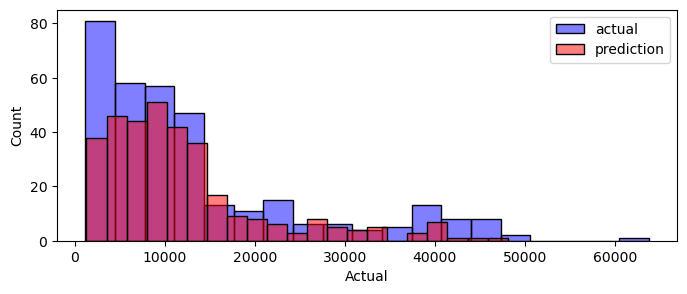

In [ ]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['KNN Regression Prediction'],color='red',alpha=0.5,label='prediction')

plt.legend()

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

print(metrics.mean_absolute_error(y_test,y_test_pred))

4252.856455792363


In [ ]:
output_df = pd.DataFrame({'Actual':y_test})
output_df['Linear Regression Prediction'] = y_test_pred

output_df

,Actual,Linear Regression Prediction
764,9095.06825,8917.541064
887,5272.17580,7057.659731
890,29330.98315,36899.870810
1293,9301.89355,9546.158773
259,33750.29180,26950.914146
...,...,...
342,13217.09450,12761.072583
308,11944.59435,14755.059875
1128,14358.36437,7352.518997
503,32548.34050,26088.980973


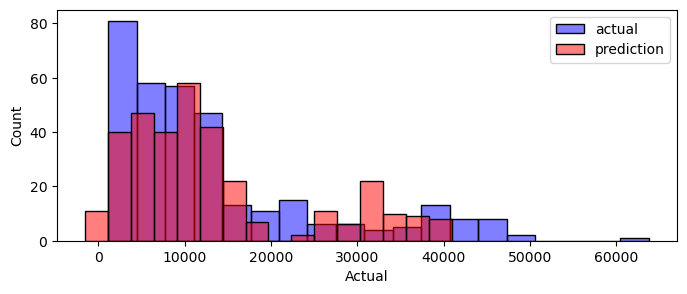

In [ ]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['Linear Regression Prediction'],color='red',alpha=0.5,label='prediction')

plt.legend()

### Support Vector Machine

In [ ]:
from sklearn.svm import SVR
from sklearn import metrics

regressor = SVR()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

print(metrics.mean_absolute_error(y_test,y_test_pred))

8483.026118616099


In [ ]:
output_df['SVM Prediction'] = y_test_pred

output_df

,Actual,Linear Regression Prediction,SVM Prediction
764,9095.06825,8917.541064,9435.608591
887,5272.17580,7057.659731,9397.716046
890,29330.98315,36899.870810,9502.334454
1293,9301.89355,9546.158773,9435.414800
259,33750.29180,26950.914146,9380.685262
...,...,...,...
342,13217.09450,12761.072583,9481.891641
308,11944.59435,14755.059875,9484.365257
1128,14358.36437,7352.518997,9390.378359
503,32548.34050,26088.980973,9374.553714


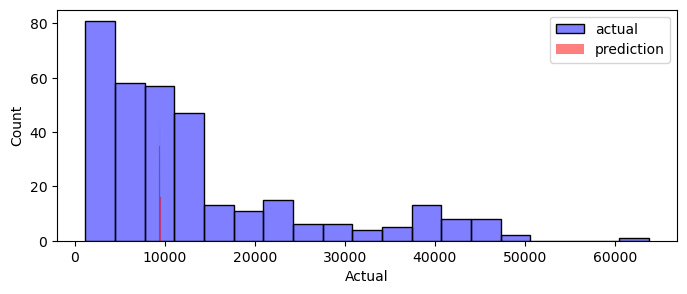

In [ ]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['SVM Prediction'],color='red',alpha=0.5,label='prediction')

plt.legend()

### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test,y_test_pred)

2842.2826946238806

In [ ]:
output_df['Decision Tree Prediction'] = y_test_pred

output_df

,Actual,Linear Regression Prediction,SVM Prediction,Decision Tree Prediction
764,9095.06825,8917.541064,9435.608591,28340.18885
887,5272.17580,7057.659731,9397.716046,5469.00660
890,29330.98315,36899.870810,9502.334454,28950.46920
1293,9301.89355,9546.158773,9435.414800,9500.57305
259,33750.29180,26950.914146,9380.685262,33732.68670
...,...,...,...,...
342,13217.09450,12761.072583,9481.891641,12638.19500
308,11944.59435,14755.059875,9484.365257,11938.25595
1128,14358.36437,7352.518997,9390.378359,4894.75330
503,32548.34050,26088.980973,9374.553714,33307.55080


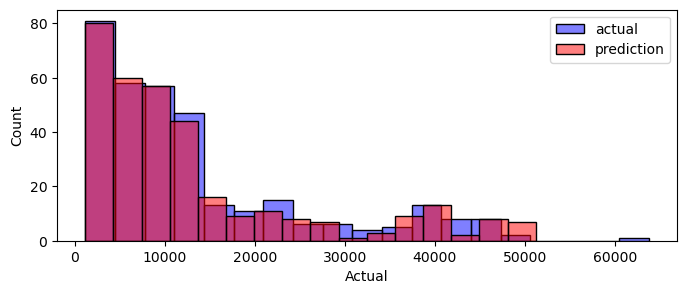

In [ ]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['Decision Tree Prediction'],color='red',alpha=0.5,label='prediction')

plt.legend()

### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test,y_test_pred)

2570.4276004982103

In [ ]:
output_df['RandomForest Prediction'] = y_test_pred

output_df

,Actual,Linear Regression Prediction,SVM Prediction,Decision Tree Prediction,RandomForest Prediction1,RandomForest Prediction
764,9095.06825,8917.541064,9435.608591,28340.18885,10706.020495,11327.563384
887,5272.17580,7057.659731,9397.716046,5469.00660,5024.934898,5810.100606
890,29330.98315,36899.870810,9502.334454,28950.46920,28080.483687,28520.617830
1293,9301.89355,9546.158773,9435.414800,9500.57305,10496.239890,10570.920296
259,33750.29180,26950.914146,9380.685262,33732.68670,34478.035698,34203.007494
...,...,...,...,...,...,...
342,13217.09450,12761.072583,9481.891641,12638.19500,13959.567515,13676.149181
308,11944.59435,14755.059875,9484.365257,11938.25595,11812.473167,12613.174977
1128,14358.36437,7352.518997,9390.378359,4894.75330,4963.690282,5359.665533
503,32548.34050,26088.980973,9374.553714,33307.55080,33672.597048,33944.015242


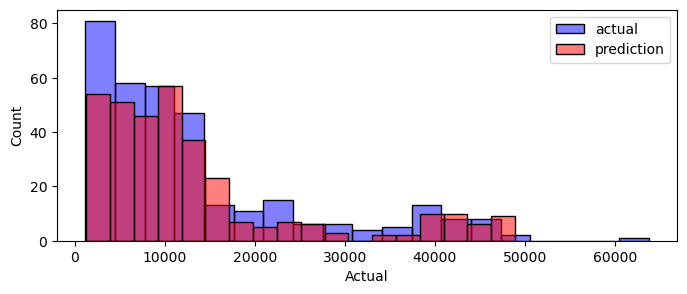

In [ ]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['RandomForest Prediction1'],color='red',alpha=0.5,label='prediction')

plt.legend()

## Step - 8: Display a plot which shows all the algorithms applied along with the scores achieved. Write your conclusion on the best algorithm for the Medical Cost Prediction problem.

In [ ]:
mae_scores = {}

# Calculate MAE for each model's predictions
for column in output_df.columns:
    if column != 'Actual':
        mae = metrics.mean_absolute_error(output_df['Actual'], output_df[column])
        mae_scores[column] = mae

# Create a DataFrame for the MAE scores
mae_df = pd.DataFrame(list(mae_scores.items()), columns=['Model', 'MAE'])

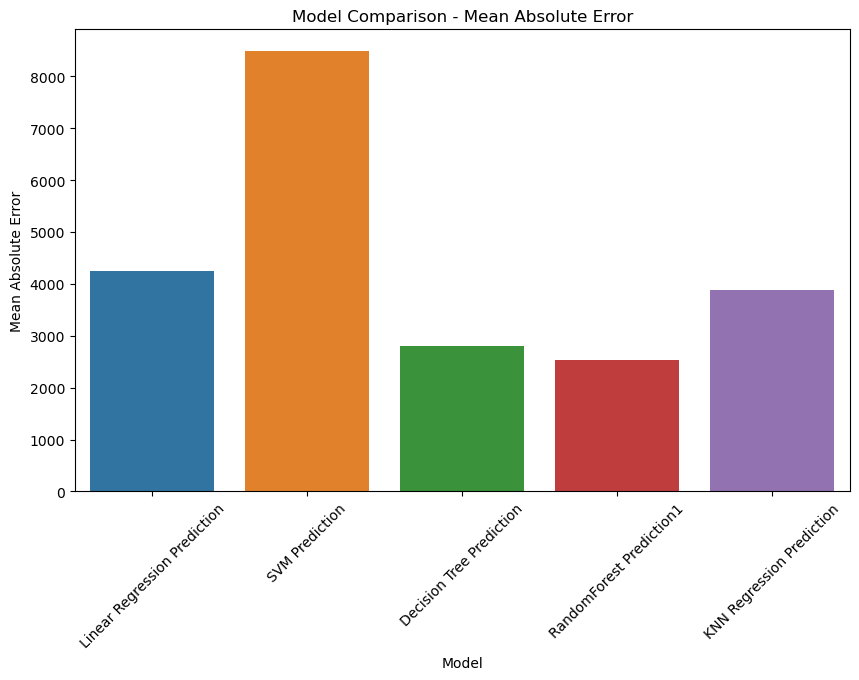

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=mae_df)
plt.title('Model Comparison - Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

In [ ]:
best_model = mae_df.loc[mae_df['MAE'].idxmin()]
print(f"The best algorithm is {best_model['Model']} with a Mean Absolute Error of {best_model['MAE']:.2f}")

The best algorithm is RandomForest Prediction1 with a Mean Absolute Error of 2531.06


In [ ]:
output_df

,Actual,Linear Regression Prediction,SVM Prediction,Decision Tree Prediction,RandomForest Prediction1,KNN Regression Prediction
764,9095.06825,8917.541064,9435.608591,28340.18885,10706.020495,8969.272860
887,5272.17580,7057.659731,9397.716046,5469.00660,5024.934898,5637.408240
890,29330.98315,36899.870810,9502.334454,28950.46920,28080.483687,25167.105170
1293,9301.89355,9546.158773,9435.414800,9500.57305,10496.239890,13092.752768
259,33750.29180,26950.914146,9380.685262,33732.68670,34478.035698,28502.849506
...,...,...,...,...,...,...
342,13217.09450,12761.072583,9481.891641,12638.19500,13959.567515,11815.239350
308,11944.59435,14755.059875,9484.365257,11938.25595,11812.473167,12689.056910
1128,14358.36437,7352.518997,9390.378359,4894.75330,4963.690282,5868.520400
503,32548.34050,26088.980973,9374.553714,33307.55080,33672.597048,18015.519302


## Conclusion

### The best algorithm is Random Forest with a Mean Absolute Error of 2531.06

Random Forest Prediction: This model has the lowest MAE, indicating that its predictions are the closest to the actual values on average. This suggests that the Random Forest model is the best performer among the evaluated models.
    
Decision Tree Prediction: The Decision Tree model has a higher MAE compared to the Random Forest models but performs better than the Linear Regression and SVM models. This suggests that while it's a good model, it might not capture the complexity of the data as well as the ensemble methods like Random Forest.    